In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import sys
sys.path.append('..')
from NIST import read_NIST, merge_NIST, plot_NIST, Fracmentation_factor

In [2]:
path = './NIST_data/'

MWs = [202, 216, 226, 228, 242, 252, 276, 300]
species_202 = ['Pyrene', 'Fluoranthene'] #, 'Acephenanthrylene']
species_216 = ['11H-benzo[a]fluorene', '11H-benzo[b]fluorene', '1-Methylpyrene']
species_226 = ['Benzo[ghi]fluoranthene', 'Cyclopenta[cd]pyrene']
species_228 = ['Benz[a]anthracene', 'Triphenylene', 'Chrysene']
# species_240 = ['Methylbenzo[ghi]fluoranthene']
species_242 = ['10-Methylbenz[a]anthracene']
# species_250 = ['Corannulene', 'Dicyclopenta[cd,mn]pyrene']
species_252 = ['Benzo[b]fluoranthene', 'Benzo[j]fluoranthene', 'Benzo[k]fluoranthene', 'Benzo[e]pyrene', 'Benzo[a]pyrene']
# species_264 = ['11H-Cyclopenta[ghi]perylene']
# species_266 = ['4H-Benzo[hi]chrysene']
species_276 = ['Indeno[1,2,3-cd]pyrene', 'Benzo[ghi]perylene']
# species_288 = ['1H_Benzo[ghi]cyclopenta[pqr]perylene']
# species_290 = ['9H-Indeno[1,2-e]pyrene']
species_300 = ['Coronene']

species_full = [species_202, species_216, species_226, species_228, species_242, species_252, species_276, species_300]

mass_spectra = read_NIST(path)

# sums = sum_vs_molion(species_full, MWs, mass_spectra)
sums = Fracmentation_factor(species_full, mass_spectra, MWs)

display(sums)

,Molecular weight,Full sum,MI v1,MI v2,MI v3,FF v1,FF v2,FF v3,MI fraction
Species,,,,,,,,,
Pyrene,202,18915.0,18885.0,14805.0,15094.0,1.001589,1.277609,1.253147,0.528628
Fluoranthene,202,18603.0,15053.0,14645.0,14884.0,1.235833,1.270263,1.249866,0.537494
11H-benzo[a]fluorene,216,25978.0,25938.0,17615.0,18724.0,1.001542,1.474766,1.387417,0.384903
11H-benzo[b]fluorene,216,26923.0,22878.0,19635.0,20884.0,1.176807,1.371174,1.289169,0.371392
1-Methylpyrene,216,30519.0,25170.0,19711.0,21428.0,1.212515,1.548323,1.424258,0.327632
Benzo[ghi]fluoranthene,226,30427.0,30387.0,17927.0,19048.0,1.001316,1.697272,1.597386,0.328623
Cyclopenta[cd]pyrene,226,18629.0,15979.0,15169.0,15619.0,1.165843,1.228097,1.192714,0.536744
Benz[a]anthracene,228,27331.0,26965.0,15883.0,16887.0,1.013573,1.720771,1.618464,0.365848
Triphenylene,228,21614.0,21314.0,15595.0,16214.0,1.014075,1.385957,1.333046,0.462617


In [15]:
def plot_rel_int(ax, Mw_index, MWs, ydata):
    for i, MW in enumerate(MWs):
        i_min, i_max = Mw_index[i], Mw_index[i+1]
        label = 'MW = ' + str(MW)
        ax.scatter(sums['Molecular weight'][i_min:i_max], sums[ydata][i_min:i_max], label = label, s = 10)
    if 'FF' in ydata:
        ax.legend(frameon = False, fontsize = 8, bbox_to_anchor = (1, 1.25), ncol =  3)
        ax.set(xlabel = 'Molecular weight', ylabel = 'Fragmentation factor', ylim = (0.9, 2))
    else:
        ax.legend(frameon = False, fontsize = 8)
        ax.set(xlabel = 'Molecular weight', ylabel = ydata)

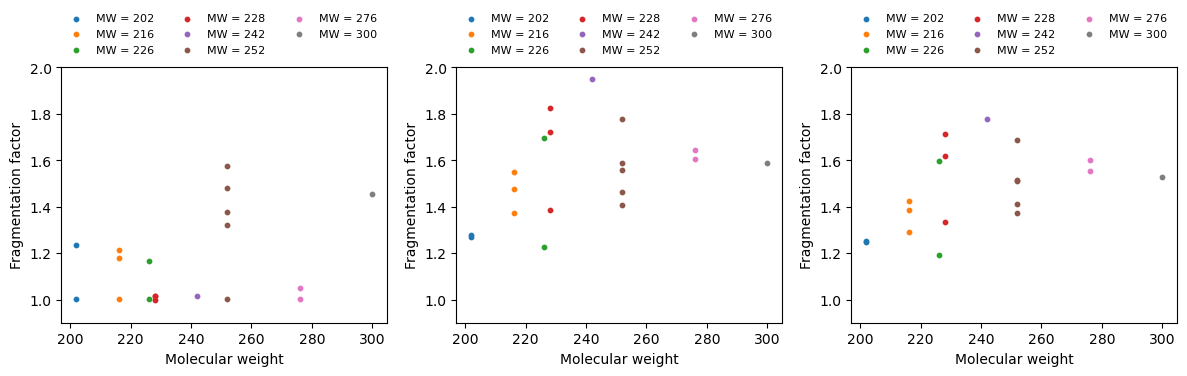

In [16]:
MW_index = [0, 2, 5, 7, 10, 11, 16, 18, 19]

fig, ax = plt.subplots(1, 3, figsize = (12, 4))

plot_rel_int(ax[0], MW_index, MWs, 'FF v1')
plot_rel_int(ax[1], MW_index, MWs, 'FF v2')
plot_rel_int(ax[2], MW_index, MWs, 'FF v3')

fig.tight_layout()
fig.savefig('NIST_spectra/FF_NIST.png', dpi = 600)
plt.show()

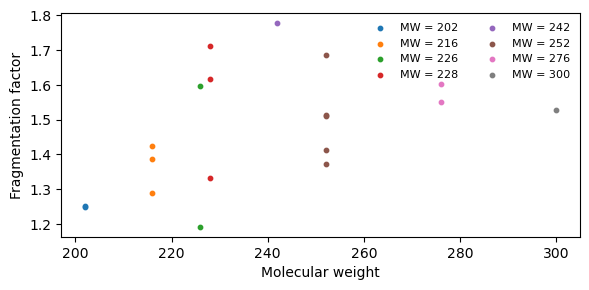

In [17]:
fig, ax = plt.subplots(figsize = (6, 3))

for i, MW in enumerate(MWs):
    i_min, i_max = MW_index[i], MW_index[i+1]
    label = 'MW = ' + str(MW)
    ax.scatter(sums['Molecular weight'][i_min:i_max], sums['FF v3'][i_min:i_max], label = label, s = 10)
ax.legend(frameon = False, fontsize = 8, ncol = 2)
ax.set(xlabel = 'Molecular weight', ylabel = 'Fragmentation factor')

fig.tight_layout()
fig.savefig('NIST_spectra/FF_v3_NIST.png', dpi = 600)
plt.show()

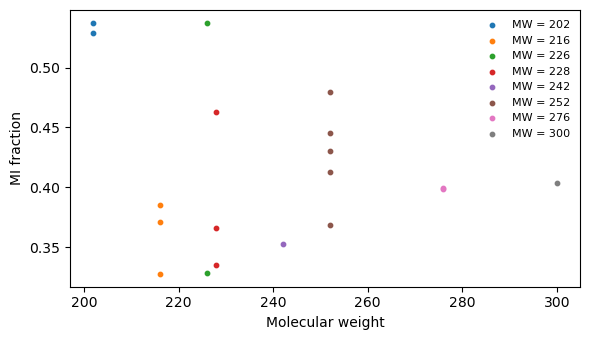

In [6]:
fig, ax = plt.subplots(figsize = (6, 3.5))

plot_rel_int(ax, MW_index, MWs, 'MI fraction')

fig.tight_layout()
fig.savefig('NIST_spectra/MI_frac_NIST.png', dpi = 600)
plt.show()

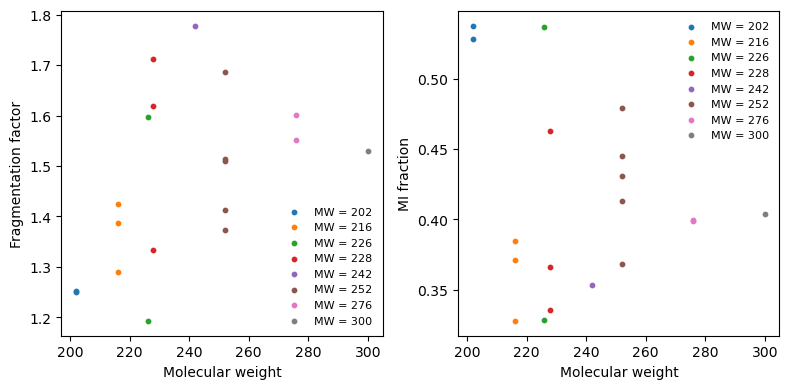

In [7]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))

for i, MW in enumerate(MWs):
    i_min, i_max = MW_index[i], MW_index[i+1]
    label = 'MW = ' + str(MW)
    ax[0].scatter(sums['Molecular weight'][i_min:i_max], sums['FF v3'][i_min:i_max], label = label, s = 10)
ax[0].legend(frameon = False, fontsize = 8)
ax[0].set(xlabel = 'Molecular weight', ylabel = 'Fragmentation factor')

plot_rel_int(ax[1], MW_index, MWs, 'MI fraction')

fig.tight_layout()
# fig.savefig('NIST_spectra/FF_v3_NIST.png', dpi = 600)
plt.show()

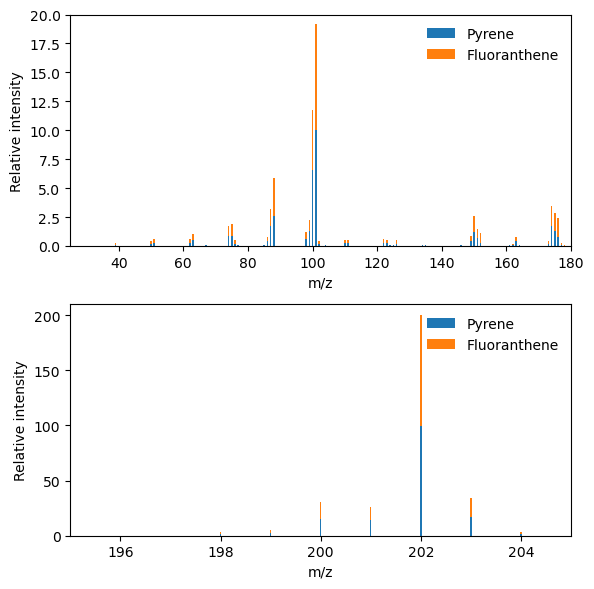

In [8]:
# MW = 202
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_NIST(species_202, mass_spectra, 0.5, ax[0], (25, 180), (0, 20))
plot_NIST(species_202, mass_spectra, 0.03, ax[1], (195, 205), (0, 210))

fig.tight_layout()
fig.savefig('NIST_spectra/MW202.png', dpi = 600)
plt.show()

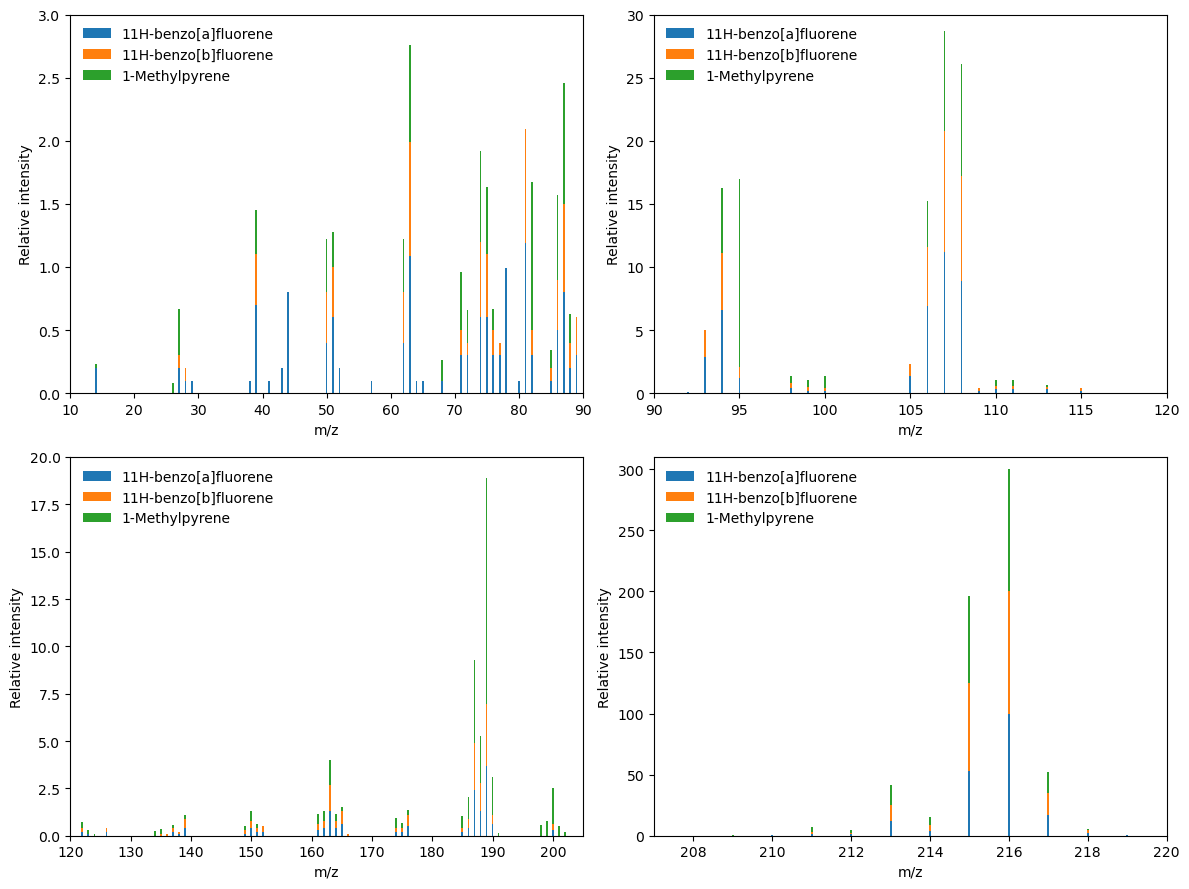

In [9]:
# MW = 216
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

plot_NIST(species_216, mass_spectra, 0.25, ax[0][0], (10, 90), (0, 3))
plot_NIST(species_216, mass_spectra, 0.1, ax[0][1], (90, 120), (0, 30))
plot_NIST(species_216, mass_spectra, 0.3, ax[1][0], (120, 205), (0, 20))
plot_NIST(species_216, mass_spectra, 0.05, ax[1][1], (207, 220), (0, 310))

fig.tight_layout()
fig.savefig('NIST_spectra/MW216.png', dpi = 600)
plt.show()

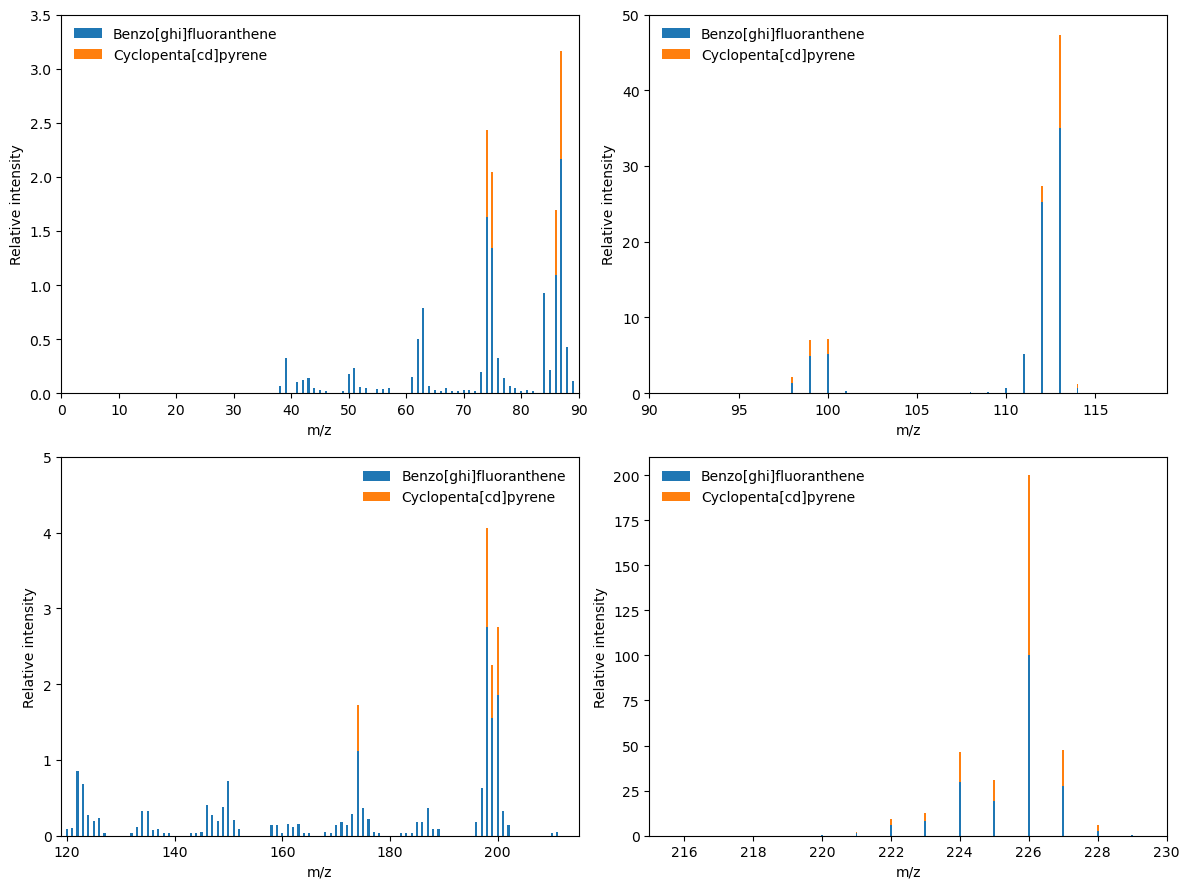

In [10]:
# MW = 226
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

plot_NIST(species_226, mass_spectra, 0.35, ax[0][0], (0, 90), (0, 3.5))
plot_NIST(species_226, mass_spectra, 0.1, ax[0][1], (90, 119), (0, 50))
plot_NIST(species_226, mass_spectra, 0.4, ax[1][0], (119, 215), (0, 5))
plot_NIST(species_226, mass_spectra, 0.05, ax[1][1], (215, 230), (0, 210))

fig.tight_layout()
fig.savefig('NIST_spectra/MW226.png', dpi = 600)
plt.show()

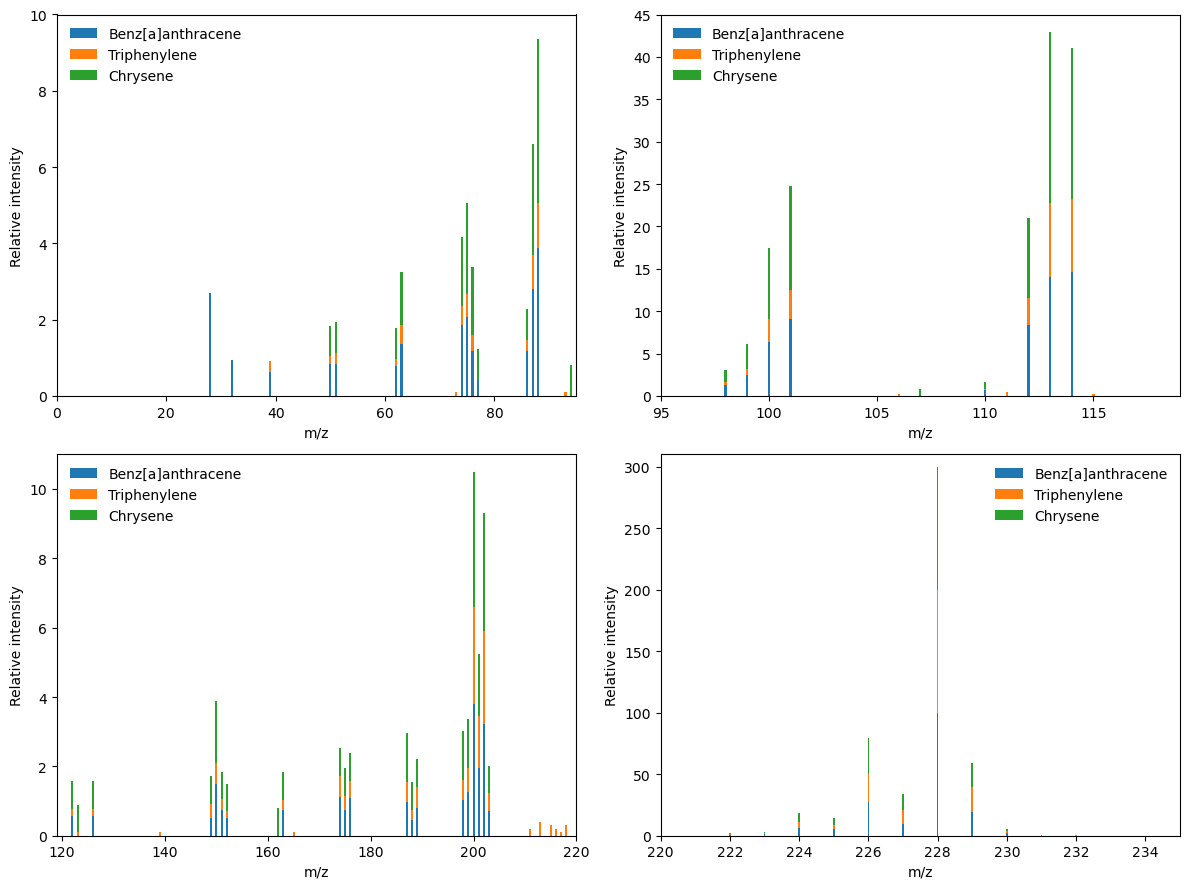

In [11]:
# MW = 228
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

plot_NIST(species_228, mass_spectra, 0.4, ax[0][0], (0, 95), (0, 10))
plot_NIST(species_228, mass_spectra, 0.1, ax[0][1], (95, 119), (0, 45))
plot_NIST(species_228, mass_spectra, 0.4, ax[1][0], (119, 220), (0, 11))
plot_NIST(species_228, mass_spectra, 0.05, ax[1][1], (220, 235), (0, 310))

fig.tight_layout()
fig.savefig('NIST_spectra/MW228.png', dpi = 600)
plt.show()

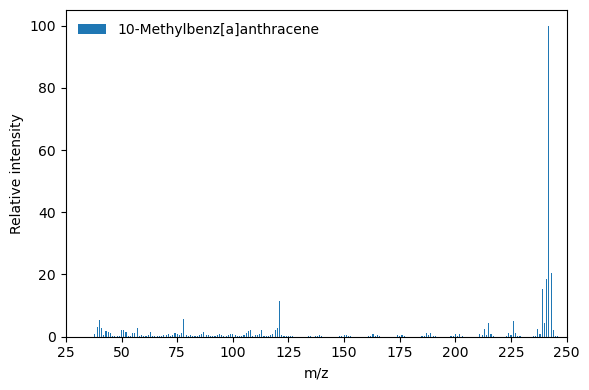

In [12]:
# MW = 242
fig, ax = plt.subplots(figsize = (6, 4))

plot_NIST(species_242, mass_spectra, 0.5, ax, (25, 250), (0, 105))

fig.tight_layout()
fig.savefig('NIST_spectra/MW242.png', dpi = 600)
plt.show()

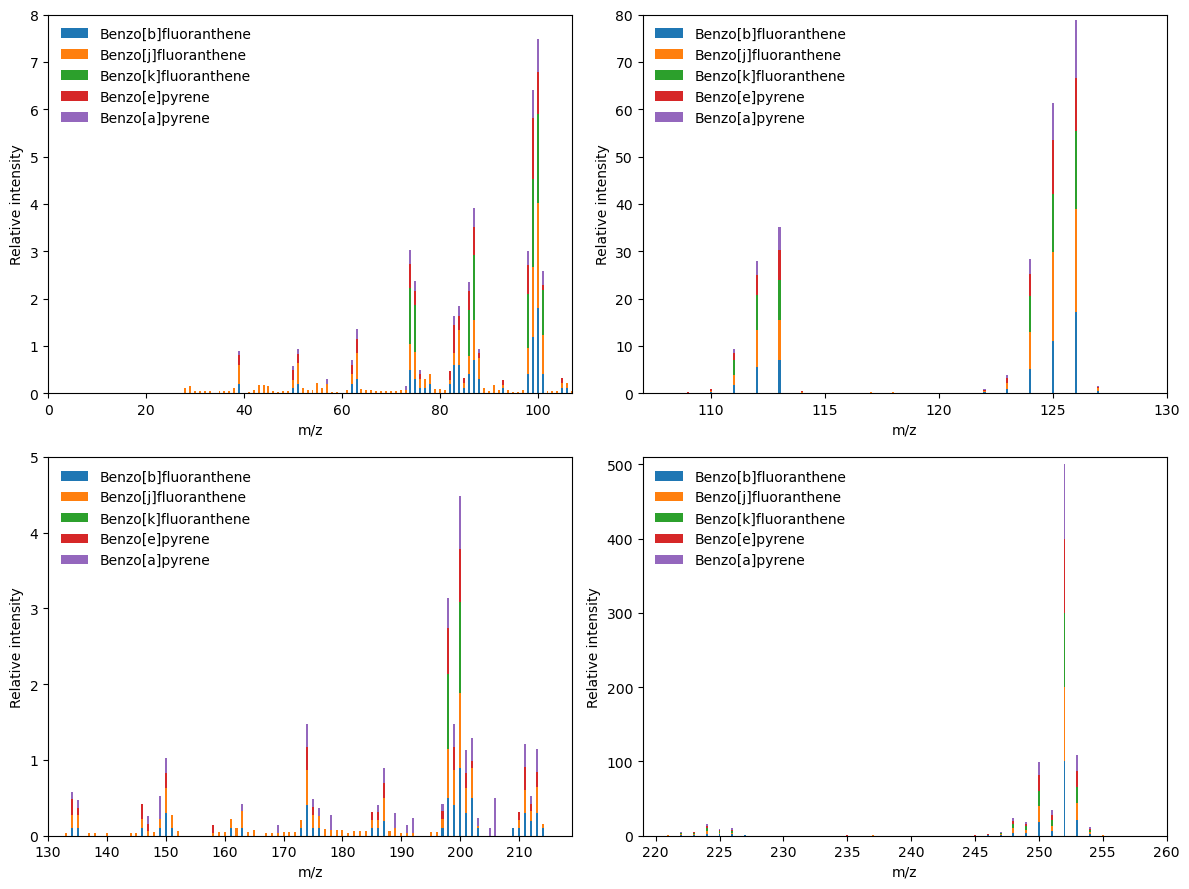

In [13]:
# MW = 252
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

plot_NIST(species_252, mass_spectra, 0.4, ax[0][0], (0, 107), (0, 8))
plot_NIST(species_252, mass_spectra, 0.09, ax[0][1], (107, 130), (0, 80))
plot_NIST(species_252, mass_spectra, 0.35, ax[1][0], (130, 219), (0, 5))
plot_NIST(species_252, mass_spectra, 0.15, ax[1][1], (219, 260), (0, 510))

fig.tight_layout()
fig.savefig('NIST_spectra/MW252.png', dpi = 600)
plt.show()

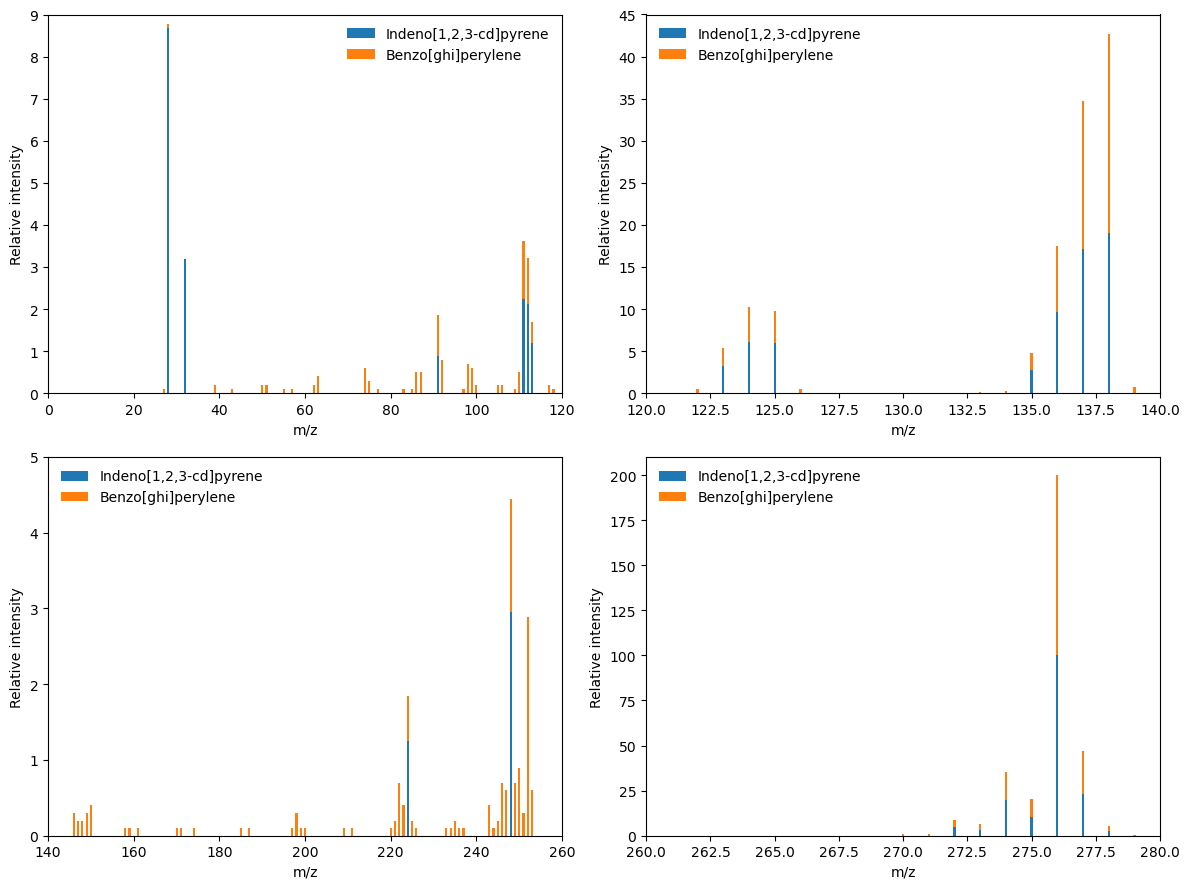

In [14]:
# MW = 276
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

plot_NIST(species_276, mass_spectra, 0.5, ax[0][0], (0, 120), (0, 9))
plot_NIST(species_276, mass_spectra, 0.09, ax[0][1], (120, 140), (0, 45))
plot_NIST(species_276, mass_spectra, 0.5, ax[1][0], (140, 260), (0, 5))
plot_NIST(species_276, mass_spectra, 0.09, ax[1][1], (260, 280), (0, 210))

fig.tight_layout()
fig.savefig('NIST_spectra/MW276.png', dpi = 600)
plt.show()

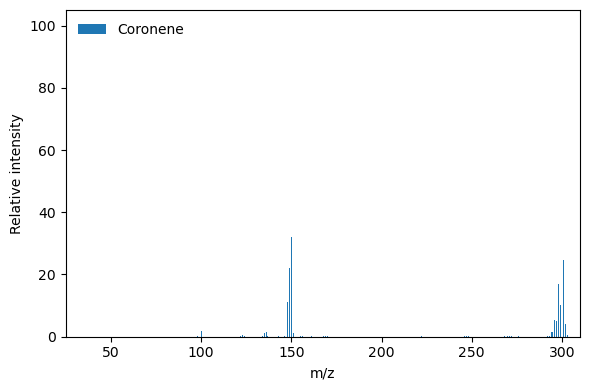

In [12]:
# MW = 300
fig, ax = plt.subplots(figsize = (6, 4))

plot_NIST(species_300, mass_spectra, 0.5, ax, (25, 310), (0, 105))

fig.tight_layout()
fig.savefig('NIST_spectra/MW300.png', dpi = 600)
plt.show()